##Estadística Aplicada

Sesión 10 - 6 de septiembre

Nombre: Susana Yareli Lino Reséndiz

Matricula: 1986245

Grupo: 41

In [1]:
#Importar las librerias basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Librerias especializadas
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter

In [7]:
#Datos
recaidas = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')
recaidas

,Paciente,tiempo,estado
0,1,5,1
1,2,8,1
2,3,12,1
3,4,24,1
4,5,32,1
5,6,17,1
6,7,16,0
7,8,17,0
8,9,19,0
9,10,30,0


In [9]:
exponencial = ExponentialFitter().fit(recaidas[' tiempo'], recaidas[' estado'])

In [10]:
#Mostrar el modelo
exponencial.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 10 total observations, 4 right-censored observations>
   number of observations = 10
number of events observed = 6
           log-likelihood = -26.41
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.00      12.25             6.00            54.00

          cmp to    z    p   -log2(p)
lambda_     0.00 2.45 0.01       6.13
---
AIC = 54.81

<Axes: >

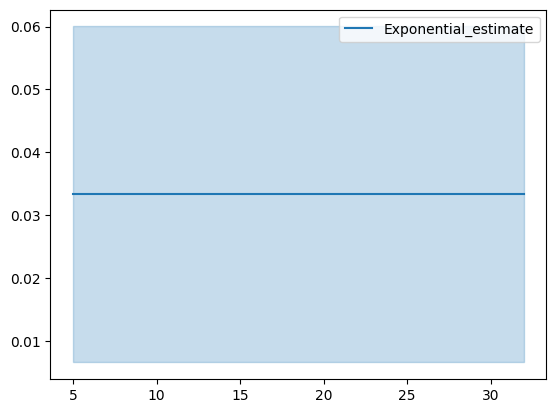

In [11]:
#Graficar la funcion de riesgo
exponencial.plot_hazard()

Text(0.5, 1.0, 'Función de riesgo de la exponencial')

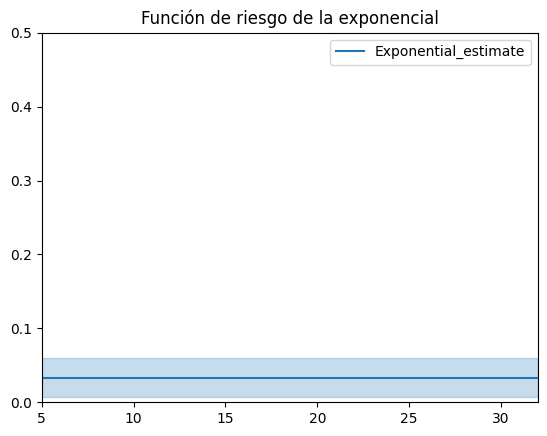

In [13]:
exponencial.plot_hazard()
plt.xlim(5, 32)
plt.ylim(0, 0.5)
plt.title('Función de riesgo de la exponencial')

(5.0, 32.0)

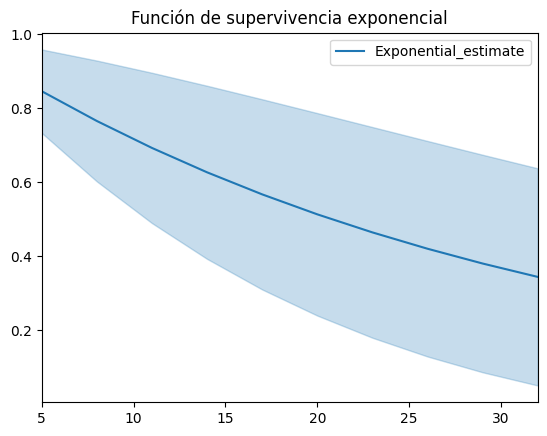

In [14]:
exponencial.plot_survival_function()
plt.title('Función de supervivencia exponencial')
plt.xlim(5,32)

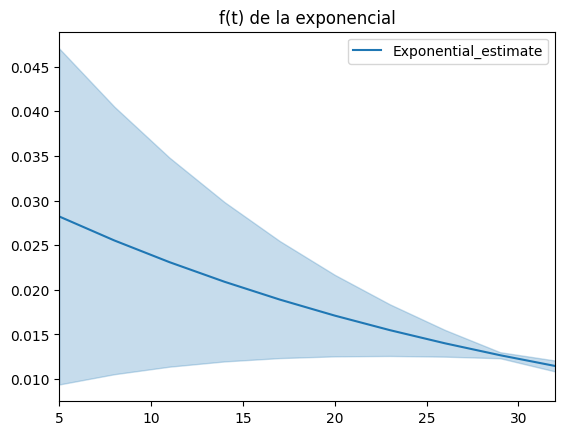

In [16]:
exponencial.plot_density()
plt.title('f(t) de la exponencial')
plt.xlim(recaidas[' tiempo'].min(), recaidas[' tiempo'].max());

##Weibull
Suponiendo que el tiempo de supervivencia se distribuye Weibull

In [17]:
mweibull = WeibullFitter().fit(recaidas[' tiempo'], recaidas [' estado'])

In [18]:
#Valor de gamma de weibull
mweibull.rho_

1.8867259500116444

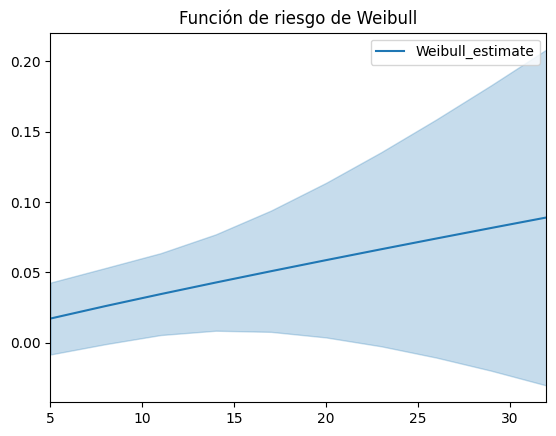

In [19]:
#Funcion de riesgo h(t)
mweibull.plot_hazard()
plt.title('Función de riesgo de Weibull')
plt.xlim(recaidas[' tiempo'].min(), recaidas[' tiempo'].max());
#gamma > 1 es creciente

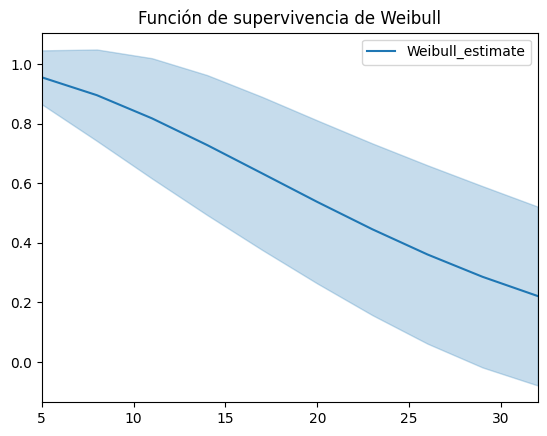

In [20]:
#Funcion de supervivencvia s(t)
mweibull.plot_survival_function()
plt.title('Función de supervivencia de Weibull')
plt.xlim(recaidas[' tiempo'].min(), recaidas[' tiempo'].max());

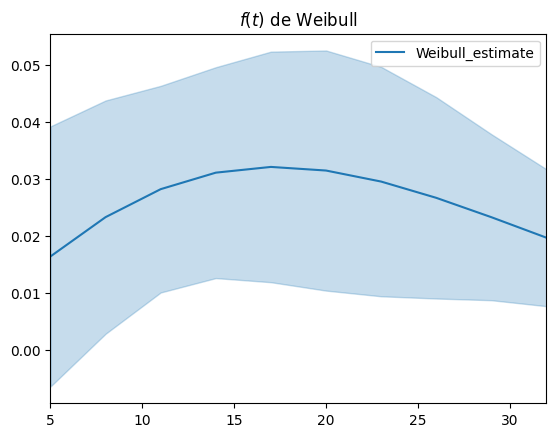

In [21]:
#f(t)
mweibull.plot_density()
plt.title('$f(t)$ de Weibull')
plt.xlim(recaidas[' tiempo'].min(), recaidas[' tiempo'].max());

##Log Normal
Suponiendo que el log tiempo de supervivencia se distibuye normal

In [22]:
mlogn = LogNormalFitter().fit(recaidas[' tiempo'], recaidas[' tiempo'])

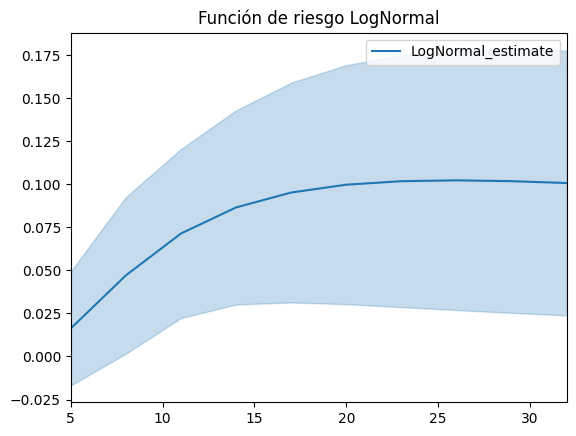

In [23]:
#Función de riesgo
mlogn.plot_hazard()
plt.title('Función de riesgo LogNormal')
plt.xlim(recaidas[' tiempo'].min(), recaidas[' tiempo'].max());

In [25]:
mlogn.hazard_

,LogNormal_estimate
5.0,0.016235
8.0,0.047035
11.0,0.071360
14.0,0.086510
17.0,0.095155
20.0,0.099711
23.0,0.101749
26.0,0.102232
29.0,0.101751
32.0,0.100672
